In [60]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#  UPX ML Certification. 


## 1. Importing and inital analysis 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

In [62]:
train = pd.read_csv('/content/gdrive/My Drive/UPX Certificate - 2/train.csv')
train.tail()

Employee ID  ... Burn Rate
21621  fffe31003500370039003100  ...  0.41    
21622  fffe33003000350031003800  ...  0.59    
21623  fffe390032003000          ...  0.72    
21624  fffe33003300320036003900  ...  0.52    
21625  fffe3400350031003800      ...  0.61    

[5 rows x 9 columns]

In [63]:
train.nunique()

Employee ID             21626
Date of Joining         366  
Gender                  2    
Company Type            2    
WFH Setup Available     2    
Designation             6    
Resource Allocation     10   
Mental Fatigue Score    101  
Burn Rate               101  
dtype: int64

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21626 entries, 0 to 21625
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           21626 non-null  object 
 1   Date of Joining       21626 non-null  object 
 2   Gender                21626 non-null  object 
 3   Company Type          21626 non-null  object 
 4   WFH Setup Available   21626 non-null  object 
 5   Designation           21626 non-null  int64  
 6   Resource Allocation   20348 non-null  float64
 7   Mental Fatigue Score  19681 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.5+ MB


## 2. Dealing with Missing values

In [65]:
train.isnull().sum()

Employee ID             0   
Date of Joining         0   
Gender                  0   
Company Type            0   
WFH Setup Available     0   
Designation             0   
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate               0   
dtype: int64

In [66]:
train = train.fillna(train.mean())
train.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [67]:
# from sklearn.preprocessing import LabelEncoder
# # creating instance of labelencoder
# labelencoder = LabelEncoder()

# original_1 = train
# mask_1 = train.isnull()


# train = train.astype(str).apply(LabelEncoder().fit_transform)
# train.where(~mask_1, original_1)
# train.isnull().sum()

In [68]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
train['Gender'] = labelencoder.fit_transform(train['Gender'])
train['Company Type'] = labelencoder.fit_transform(train['Company Type'])
train['WFH Setup Available'] = labelencoder.fit_transform(train['WFH Setup Available'])


train.head()

Employee ID Date of Joining  ...  Mental Fatigue Score  Burn Rate
0  fffe32003000360033003200  30-09-2008      ...  3.8                   0.16     
1  fffe3700360033003500      30-11-2008      ...  5.0                   0.36     
2  fffe31003300320037003900  10-03-2008      ...  5.8                   0.49     
3  fffe32003400380032003900  03-11-2008      ...  2.6                   0.20     
4  fffe31003900340031003600  24-07-2008      ...  6.9                   0.52     

[5 rows x 9 columns]

## 3. Exploratory Data Analysis

### Feature Selection

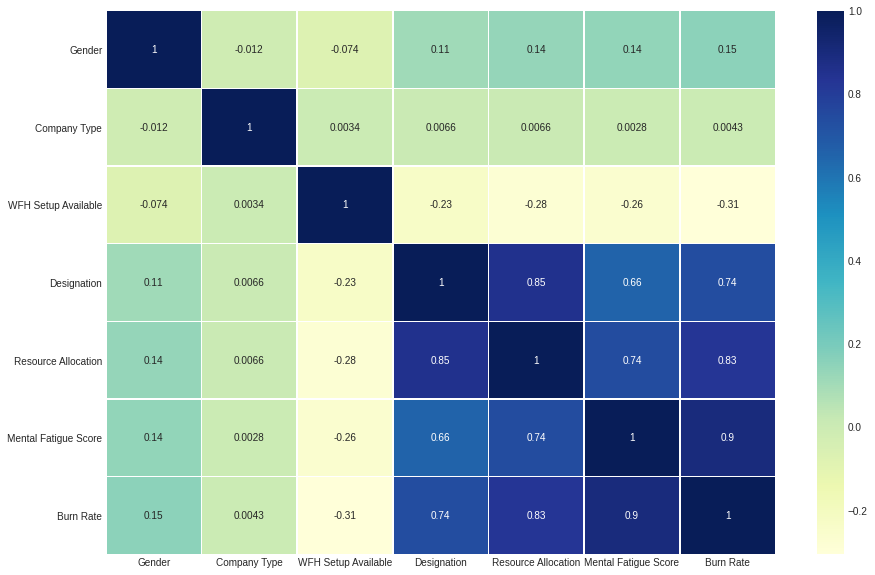

In [69]:
# Correlation Coefficient Matrix => Train Dataset

corr = train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, linewidths = 0.5);

In [91]:
plt.figure(figsize = (20,8))
sns.pairplot(palette = 'BrBG', data = train);

<Figure size 1440x576 with 0 Axes>

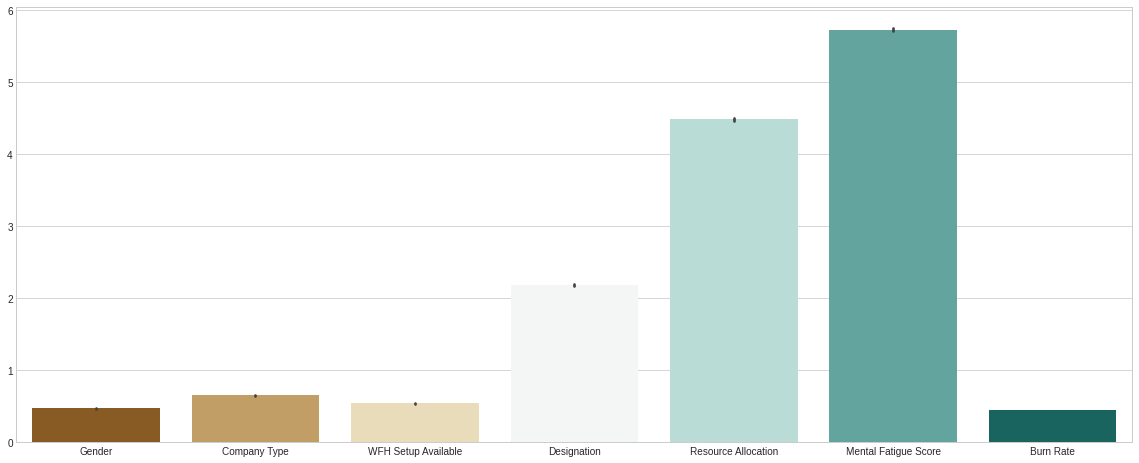

In [70]:
plt.figure(figsize = (20,8))
sns.barplot(palette = 'BrBG', data = train);

In [71]:
plt.figure(figsize = (20,15))
sns.boxplot(data = train);

### Converting Dates into datetime format


In [72]:
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'])

In [73]:
# Converting dates into individual types 

# Extracting Date features 
def extract_time_features(df):
    df['Date']=pd.to_datetime(df['Date of Joining'])
    df['year'] = df['Date of Joining'].dt.year
    df['month'] = df['Date of Joining'].dt.month
    df['day_of_week'] = df['Date of Joining'].dt.dayofweek
    df['Day'] = df['Date of Joining'].dt.day
    df['DayOfyear'] = df['Date of Joining'].dt.dayofyear
    df['Week'] = pd.to_datetime(df['Date of Joining']).dt.week 
    df['Quarter'] = pd.to_datetime(df['Date of Joining']).dt.quarter  
    # df['Is_month_start'] = pd.to_datetime(df['DATE']).dt.is_month_start 
    # df['Is_month_end'] = pd.to_datetime(df['DATE']).dt.is_month_end 
    del df['Date of Joining']
    return df

In [74]:
train = extract_time_features(train)

In [75]:
train.drop(['Date'], axis = 1, inplace = True)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21626 entries, 0 to 21625
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           21626 non-null  object 
 1   Gender                21626 non-null  int64  
 2   Company Type          21626 non-null  int64  
 3   WFH Setup Available   21626 non-null  int64  
 4   Designation           21626 non-null  int64  
 5   Resource Allocation   21626 non-null  float64
 6   Mental Fatigue Score  21626 non-null  float64
 7   Burn Rate             21626 non-null  float64
 8   year                  21626 non-null  int64  
 9   month                 21626 non-null  int64  
 10  day_of_week           21626 non-null  int64  
 11  Day                   21626 non-null  int64  
 12  DayOfyear             21626 non-null  int64  
 13  Week                  21626 non-null  int64  
 14  Quarter               21626 non-null  int64  
dtypes: float64(3), int6

In [77]:
train.head()

Employee ID  Gender  Company Type  ...  DayOfyear  Week  Quarter
0  fffe32003000360033003200  0       1             ...  274        40    3      
1  fffe3700360033003500      1       1             ...  335        48    4      
2  fffe31003300320037003900  0       0             ...  277        40    4      
3  fffe32003400380032003900  1       1             ...  71         11    1      
4  fffe31003900340031003600  0       1             ...  206        30    3      

[5 rows x 15 columns]

### Droping the id column

In [78]:
# drop columns array
drop_col_array = ['Employee ID']
print(drop_col_array)

['Employee ID']


In [79]:
# drop INCIDENT_ID
train = train.drop(drop_col_array, axis=1)
print(train.shape)

(21626, 14)


In [80]:
# Splitting training dataset into train and test
X = train.copy().drop(['Burn Rate'], axis=1).values
y = train['Burn Rate']

In [81]:
print(train.shape)
print(X.shape)
print(y.shape)

(21626, 14)
(21626, 13)
(21626,)


## Model Building

In [82]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 1215115)

In [83]:
# Feature Scaling
sc = StandardScaler()
sc_fit = sc.fit(X_train)
X_train = sc_fit.transform(X_train)
X_test = sc_fit.transform(X_test)

###  Regression Models

In [85]:
!pip install catboost

     |████████████████████████████████| 66.3MB 52kB/s 


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [87]:
#  Random Forest Model 

rf = RandomForestRegressor()
rf_fit = rf.fit(X_train, y_train)

# Predictions

y_rf_pred_test = rf_fit.predict(X_test)
y_rf_pred_train = rf_fit.predict(X_train)


print('Test RMSE:', sqrt(mean_squared_error(y_test, y_rf_pred_test))) #Test RMSE
print('Train RMSE:', sqrt(mean_squared_error(y_train, y_rf_pred_train))) #Train RMSE 

Test RMSE: 0.06294199718325559
Train RMSE: 0.023790197894063368


In [88]:
#  XBGR  Model 

xgb = XGBRegressor(learning_rate = 0.01, max_depth = 6, colsample_bytree = 0.8, seed = 100)
xgb_fit = xgb.fit(X_train, y_train)

# Predictions

y_xgb_pred_test = xgb_fit.predict(X_test)
y_xgb_pred_train = xgb_fit.predict(X_train)


print('Test RMSE:', sqrt(mean_squared_error(y_test, y_xgb_pred_test))) #Test RMSE
print('Train RMSE:', sqrt(mean_squared_error(y_train, y_xgb_pred_train))) #Train RMSE 

[07:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: 0.09883535012376844
Train RMSE: 0.09773866453670624


In [89]:
#  LGBMR  Model 

lgb = LGBMRegressor()
lgb_fit = lgb.fit(X_train, y_train)

# Predictions

y_lgb_pred_test = lgb_fit.predict(X_test)
y_lgb_pred_train = lgb_fit.predict(X_train)


print('Test RMSE:', sqrt(mean_squared_error(y_test, y_lgb_pred_test))) #Test RMSE
print('Train RMSE:', sqrt(mean_squared_error(y_train, y_lgb_pred_train))) #Train RMSE 

Test RMSE: 0.05949316488799362
Train RMSE: 0.055403692440612315


In [90]:
#  CatBoost  Model 

cat = CatBoostRegressor()
cat_fit = cat.fit(X_train, y_train)

# Predictions

y_cat_pred_test = cat_fit.predict(X_test)
y_cat_pred_train = cat_fit.predict(X_train)


print('Test RMSE:', sqrt(mean_squared_error(y_test, y_cat_pred_test))) #Test RMSE
print('Train RMSE:', sqrt(mean_squared_error(y_train, y_cat_pred_train))) #Train RMSE 

Learning rate set to 0.063625
0:	learn: 0.1875694	total: 51.2ms	remaining: 51.1s
1:	learn: 0.1784369	total: 55.2ms	remaining: 27.5s
2:	learn: 0.1696649	total: 58.7ms	remaining: 19.5s
3:	learn: 0.1615188	total: 62.3ms	remaining: 15.5s
4:	learn: 0.1541395	total: 65.8ms	remaining: 13.1s
5:	learn: 0.1469810	total: 69.3ms	remaining: 11.5s
6:	learn: 0.1404037	total: 72.9ms	remaining: 10.3s
7:	learn: 0.1342558	total: 76.3ms	remaining: 9.46s
8:	learn: 0.1287342	total: 79.9ms	remaining: 8.79s
9:	learn: 0.1237633	total: 83.6ms	remaining: 8.28s
10:	learn: 0.1188344	total: 87.1ms	remaining: 7.83s
11:	learn: 0.1143765	total: 90.6ms	remaining: 7.46s
12:	learn: 0.1102830	total: 94.2ms	remaining: 7.15s
13:	learn: 0.1064040	total: 97.7ms	remaining: 6.88s
14:	learn: 0.1027861	total: 101ms	remaining: 6.64s
15:	learn: 0.0994878	total: 105ms	remaining: 6.43s
16:	learn: 0.0965015	total: 108ms	remaining: 6.25s
17:	learn: 0.0937141	total: 112ms	remaining: 6.09s
18:	learn: 0.0912086	total: 115ms	remaining: 5.9